# Create UV-Vis Dataset for E3NN Machine Learning

### Download Modules

In [1]:
%%capture
!pip install PubChemPy

In [145]:
import pandas as pd
import numpy as np
import io
import sys

from openbabel import pybel

# Import modules
import nglview as nv
import ase.io
import matplotlib.pyplot as plt
import rdkit

# Load psi4 to compute orbitals
import psi4


### Download experimental UV-Vis data

In [1]:
! wget https://raw.githubusercontent.com/PNNL-CompBio/ML_UVvisModels/main/Data/UV_w_SMILES.csv

--2025-07-26 19:20:13--  https://raw.githubusercontent.com/PNNL-CompBio/ML_UVvisModels/main/Data/UV_w_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3442000 (3.3M) [text/plain]
Saving to: ‘UV_w_SMILES.csv.2’

UV_w_SMILES.csv.2   100%[===================>]   3.28M  --.-KB/s    in 0.04s   

2025-07-26 19:20:13 (77.9 MB/s) - ‘UV_w_SMILES.csv.2’ saved [3442000/3442000]



### Load experimental data in Pandas

In [2]:
import pandas as pd

In [3]:
# Define the file path to the CSV file containing UV-Vis data with SMILES strings
uvvis_file = "UV_w_SMILES.csv"

# Read the CSV file into a pandas DataFrame
uvvis_data = pd.read_csv(uvvis_file,header=None)

# Display the contents of the DataFrame
uvvis_data

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,NC1=NC2=C(C=CC=C2)[N+]([O-])=N1,0.299539,0.311787,0.328491,0.349915,0.376548,0.408694,0.446354,0.489792,0.537421,...,0.092434,0.095006,0.097484,0.099952,0.102239,0.104428,0.106597,0.108721,0.110758,0.112611
1,NC1=NC2=C(C=CC=C2)N=N1,0.411922,0.447550,0.487158,0.530422,0.576958,0.626523,0.678088,0.731087,0.783621,...,0.094415,0.095031,0.095445,0.095832,0.095950,0.095919,0.095820,0.095594,0.095204,0.094772
2,CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1,0.732482,0.794217,0.853497,0.907398,0.952023,0.983787,1.000000,0.998714,0.982111,...,0.398864,0.409874,0.420358,0.429326,0.437889,0.445579,0.452843,0.459056,0.464107,0.468328
3,CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O,0.412611,0.399813,0.390055,0.382307,0.376957,0.373062,0.371521,0.370622,0.371992,...,0.033980,0.029478,0.024774,0.020789,0.017146,0.013311,0.009733,0.006266,0.003120,0.000000
4,NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O,0.991241,1.000000,0.996943,0.979253,0.944010,0.890630,0.820660,0.739217,0.655266,...,0.000543,0.000694,0.000529,0.000495,0.000374,0.000433,0.000577,0.000560,0.000574,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,c1csc(c1)-c1ncc2ccccn12,0.780693,0.749204,0.723286,0.700154,0.678959,0.664063,0.651104,0.639720,0.630878,...,0.022660,0.018397,0.015018,0.011409,0.009047,0.006746,0.004517,0.002713,0.001453,0.000000
928,c1coc(c1)-c1ccnc2nncn12,0.646698,0.659208,0.668289,0.674135,0.676552,0.674330,0.668094,0.656831,0.642216,...,0.000538,0.000339,0.000440,0.000230,0.000327,0.000148,0.000129,0.000055,0.000000,0.000164
929,Nc1nc(cs1)-c1cccs1,0.588011,0.585420,0.584680,0.585494,0.588826,0.593638,0.601041,0.610887,0.623694,...,0.000496,0.000444,0.000807,0.000770,0.001036,0.000355,0.000222,0.000496,0.000000,0.000155
930,Nc1nccc(n1)-c1cccs1,0.687236,0.686341,0.680750,0.670685,0.658608,0.642728,0.622375,0.595983,0.564895,...,0.002908,0.002147,0.003086,0.002348,0.001141,0.001364,0.000470,0.000403,0.000000,0.000716


### Load computational data in Pandas

In [10]:
uvvis_compute_file = "spectra.csv"
uvvis_compute = pd.read_csv(uvvis_compute_file,header=0)
uvvis_compute

,molecule,wavelengths,oscillator_strengths,width,kind,spectrum,geometry
0,0,"[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01...",10.0,gaussian,"[6.584023782400465e-37, 2.3158380383515078e-36...",N -3.194913 -1.099563 -0.049679\nC -1.939558 -...
1,1,"[553.3, 447.55, 410.57, 338.85, 292.74, 258.73...","[0.0, 0.0, 0.0, 0.0056, 0.0, 0.1391, 0.0, 0.02...",10.0,gaussian,"[2.445615581585906e-39, 8.82581111898111e-39, ...",N -3.316261 -0.627553 -0.037143\nC -2.017001 -...
2,2,"[376.59, 301.83, 291.23, 282.71, 272.19, 249.0...","[0.0, 0.0, 0.2372, 0.0, 0.0, 0.0446, 0.0001, 0...",10.0,gaussian,"[1.5542069668862901e-40, 5.78935876725559e-40,...",C -3.695356 -0.455952 0.885831\nC -3.060721 0....
3,3,"[411.48, 297.54, 276.24, 274.52, 259.06, 253.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196, 0.0, 0....",10.0,gaussian,"[9.102330535330581e-40, 3.428097820136208e-39,...",C -1.994391 -2.196876 -1.200074\nN -2.613428 -...
4,4,"[336.14, 310.85, 287.29, 270.0, 251.64, 245.75...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009...",10.0,gaussian,"[8.606801642423844e-41, 3.2606417532714058e-40...",N -1.218708 -2.583113 -0.521656\nC -1.542766 -...
...,...,...,...,...,...,...,...
914,927,"[513.86, 329.73, 305.57, 273.2, 250.94, 250.34...","[0.0, 0.0, 0.0, 0.0842, 0.0, 0.5002, 0.0, 0.0,...",10.0,gaussian,"[2.189129348902332e-44, 8.843872238138088e-44,...",C -3.218491 -1.256781 0.720118\nC -3.739489 -0...
915,928,"[885.32, 465.07, 346.17, 285.83, 265.05, 261.0...","[0.0, 0.0, 0.0, 0.0, 0.3471, 0.0, 0.0, 0.0, 0....",10.0,gaussian,"[1.7775896506168923e-38, 6.478388623797543e-38...",C 3.700079 0.112192 0.405904\nC 3.322249 -0.86...
916,929,"[567.6, 319.2, 280.59, 247.38, 232.0, 212.96, ...","[0.0, 0.0, 0.0, 0.333, 0.0, 0.0, 0.0073, 0.0, ...",10.0,gaussian,"[6.453074084128581e-43, 2.550020852711502e-42,...",N 3.475363 1.426662 0.225546\nC 2.425250 0.608...
917,930,"[524.14, 325.86, 314.71, 247.03, 241.4, 237.78...","[0.0, 0.0, 0.0, 0.4325, 0.0, 0.0, 0.0, 0.0089,...",10.0,gaussian,"[1.0430163203088624e-41, 3.935471701089051e-41...",N 3.363401 -1.616042 -0.434690\nC 2.518062 -0....


In [33]:
uvvis_compute.iloc[918,0] # row 918, column 0
uvvis_compute.iloc[4]['wavelengths'] # wavelengths of row 4
uvvis_compute.iloc[4]['spectrum'] # spectrum of row 4

print(pd.read_json(uvvis_compute.iloc[4]['spectrum']))
#list(uvvis_compute.iloc[4]['spectrum'])
#print(type(uvvis_compute.iloc[4]['spectrum']))

                0
0    8.606802e-41
1    3.260642e-40
2    1.222999e-39
3    4.541625e-39
4    1.669777e-38
..            ...
796  0.000000e+00
797  0.000000e+00
798  0.000000e+00
799  0.000000e+00
800  0.000000e+00

[801 rows x 1 columns]


### Plot example computational spectrum

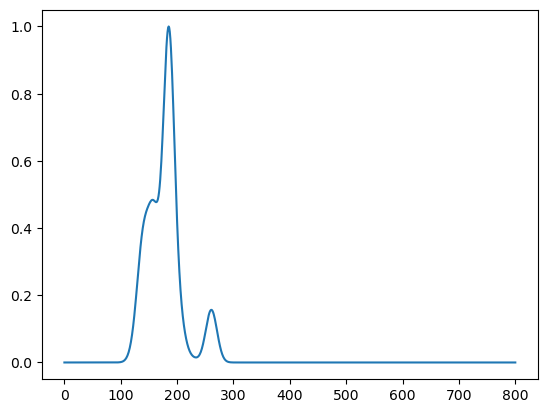

In [225]:
import matplotlib.pyplot as plt

plt.plot(pd.read_json(uvvis_compute.iloc[0]['spectrum']))
plt.show()

### Plot example experimental spectrum

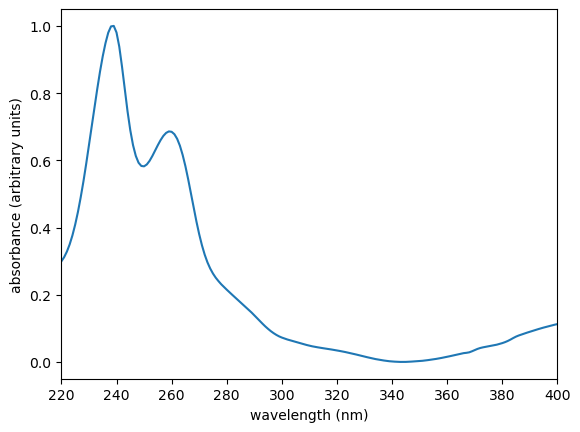

In [226]:
# Extract Y-values starting from index 1 (excluding the first column) at row index 220 of the DataFrame
yvalues = uvvis_data.iloc[0, 1:].to_numpy()

# Display the Y-values as a numpy array
yvalues

import numpy as np
xvalues = np.arange(220,401,1)
import matplotlib.pyplot as plt

plt.xlabel('wavelength (nm)')
plt.ylabel('absorbance (arbitrary units)')
plt.plot(xvalues,yvalues)
plt.xlim(220,400)
plt.show()

### Plot combined data

But let's shift the computed spectrum by 50 nm to the right. Does this better match the experimental spectrum?

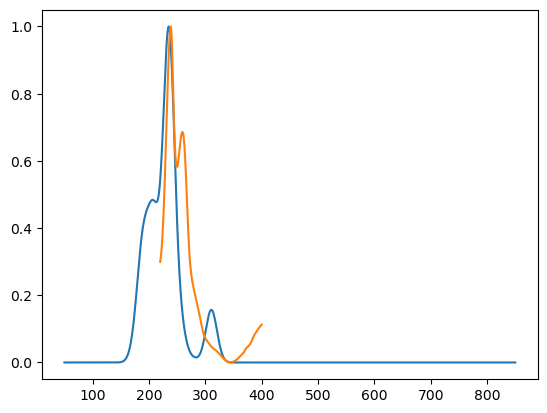

In [229]:
uid = 0

y_exp = uvvis_data.iloc[uid, 1:].to_numpy()
y_com = pd.read_json(uvvis_compute.loc[uvvis_compute['molecule'] == uid]['spectrum'].iloc[0])

x_exp = np.arange(220,401,1)
x_com = np.arange(50,851,1)
plt.plot(x_com, y_com)
plt.plot(xvalues, y_exp)
plt.show()

### Computing average shift 

It seems that the shift allows for a better match of the experimental spectrum. But what is the correct shift to be applied to all molecules?

Let's work on automating a calculation to determine what shift gives an optimal match between computational and experimental spectra. This script should match the highest peaks. But another option would be to minimize the rmsd. 

Once we have something working for a single molecule we can generalize to the entire dataset and compute the average.

#### i. Load spectra

In [236]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

uid = 77

# ——————————————  
# 1. Load your spectra
# ——————————————
# exp: from 220 to 400 nm
x_exp = np.arange(220, 401, 1)
y_exp = uvvis_data.iloc[uid, 1:].to_numpy()

# comp: from 0 to 800 nm
x_comp = np.arange(0, 801, 1)
y_comp = pd.read_json(uvvis_compute.loc[uvvis_compute['molecule'] == uid]['spectrum'].iloc[0]).values.flatten()

#### ii. Peak matching

In [237]:

# detect peaks (you can tweak height and distance)
peaks_exp, props_exp = find_peaks(y_exp, height=0.1, distance=5)
peaks_comp, props_comp = find_peaks(y_comp, height=0.1, distance=5)

In [238]:
# pick the top 1 peak by height
def top_n(peaks, heights, n=2):
    idx = np.argsort(heights)[-n:]
    return peaks[idx]

n = 1
# get peak positions
exp_pos = x_exp[top_n(peaks_exp, props_exp['peak_heights'], n)]
comp_pos = x_comp[top_n(peaks_comp, props_comp['peak_heights'], n)]

# compute shifts for each matched pair and average
shifts = exp_pos - comp_pos
shift_peak = shifts.mean()
print(f"Peak‐matching shift = {shift_peak:.2f} nm")

Peak‐matching shift = 63.00 nm


iii. RMSD-based refinement

In [239]:
def rmsd(delta):
    y_comp_shifted = np.interp(x_exp, x_comp + delta, y_comp)
    return np.sqrt(((y_exp - y_comp_shifted)**2).mean())

res = minimize_scalar(rmsd, bounds=(-50, 50), method='bounded')
shift_rms = res.x
print(f"RMSD‐optimized shift = {shift_rms:.2f} nm (RMSD={res.fun:.4f})")

RMSD‐optimized shift = 17.00 nm (RMSD=0.3053)


#### iv. Visual check

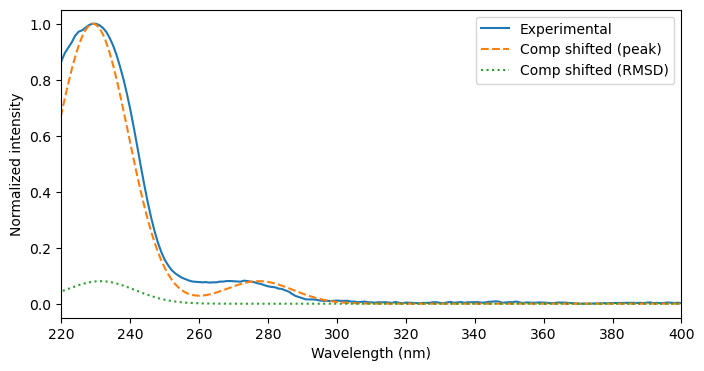

In [240]:
plt.figure(figsize=(8,4))
plt.plot(x_exp, y_exp,    label='Experimental')
plt.plot(x_comp+shift_peak, y_comp, '--', label='Comp shifted (peak)')
plt.plot(x_comp+shift_rms,  y_comp, ':', label='Comp shifted (RMSD)')
plt.xlim(220,400)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized intensity')
plt.show()

#### Shift compute function with peak position

In [120]:
# pick the top 2 peaks by height
def top_n(peaks, heights, n=2):
    idx = np.argsort(heights)[-n:]
    return peaks[idx]

# Function to compute shift
def shift_compute(molid):

    # exp: from 220 to 400 nm
    x_exp = np.arange(220, 401, 1)
    y_exp = uvvis_data.iloc[molid, 1:].to_numpy()
    
    # comp: from 0 to 800 nm
    x_comp = np.arange(0, 801, 1)
    y_comp = pd.read_json(uvvis_compute.loc[uvvis_compute['molecule'] == molid]['spectrum'].iloc[0]).values.flatten()
    if not y_comp.any():
        return None

    # detect peaks (you can tweak height and distance)
    peaks_exp, props_exp = find_peaks(y_exp, height=0.1, distance=5)
    peaks_comp, props_comp = find_peaks(y_comp, height=0.1, distance=5)

    n_peaks = 1
    # get peak positions
    exp_pos = x_exp[top_n(peaks_exp, props_exp['peak_heights'], n)]
    comp_pos = x_comp[top_n(peaks_comp, props_comp['peak_heights'], n)]

    if len(peaks_exp) < n_peaks or len(peaks_comp) < n_peaks:
        return None
    
    # compute shifts for each matched pair and average
    shifts = exp_pos - comp_pos
    shift_peak = shifts.mean()
    #print(f"Peak‐matching shift = {shift_peak:.2f} nm")

    return shift_peak


#### Determine shift average

In [241]:
count = 0
shift_average = 0.0

# Iterate through each row in the uvvis_df DataFrame
for index, row in uvvis_compute.iterrows():

    #if count > 800:
        #print(row)
    idx = int(row['molecule'])


    out = shift_compute(idx)
    if out:
        shift_average += shift_compute(idx)
        count += 1

shift_average /= float(count)
print(shift_average, count)

87.77037887485649 871


### Shift computed spectra

Now we need a function that will shift the computed spectra by the appropriate amount and truncate the experimental data from 220 - 400 nm. 

In [243]:
def get_shifted_comp(molid, shift):
    
    # 2) load raw comp spectrum
    x_comp = np.arange(0, 801, 1)
    spec_json = uvvis_compute.loc[
        uvvis_compute['molecule'] == molid, 'spectrum'
    ].iloc[0]
    y_comp = pd.read_json(spec_json).values.flatten()
    
    # 3) define target grid (220–400 nm at 1 nm)
    x_trunc = np.arange(220, 401, 1)
    
    # 4) shift & interpolate onto the target grid
    y_shifted = np.interp(x_trunc, x_comp + shift, y_comp,
                          left=0.0, right=0.0)
    
    return x_trunc, y_shifted

#### Some sample shifts

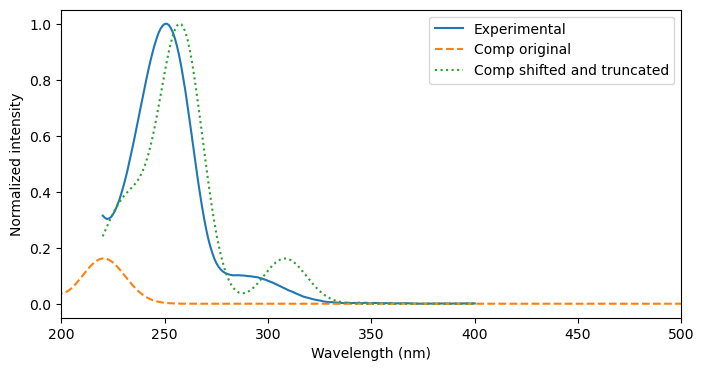

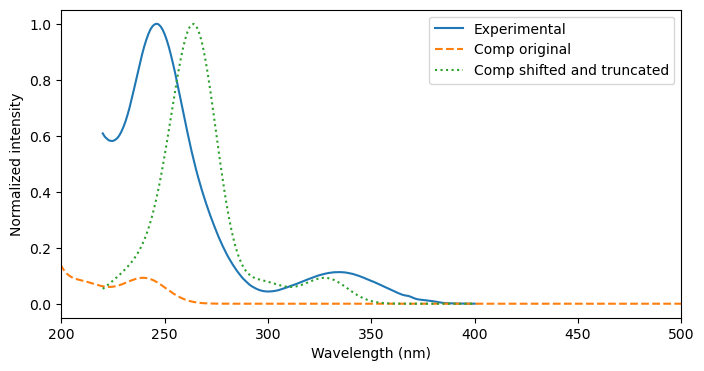

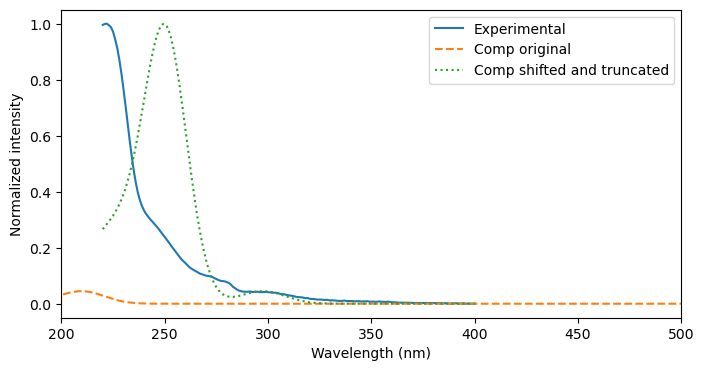

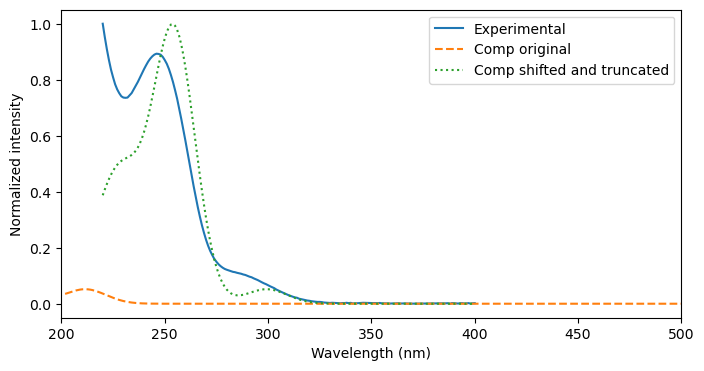

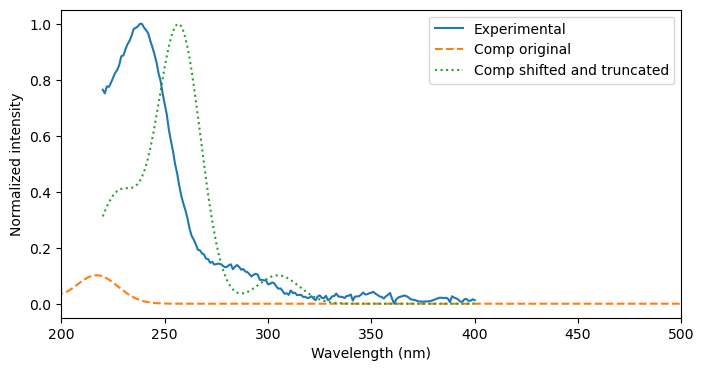

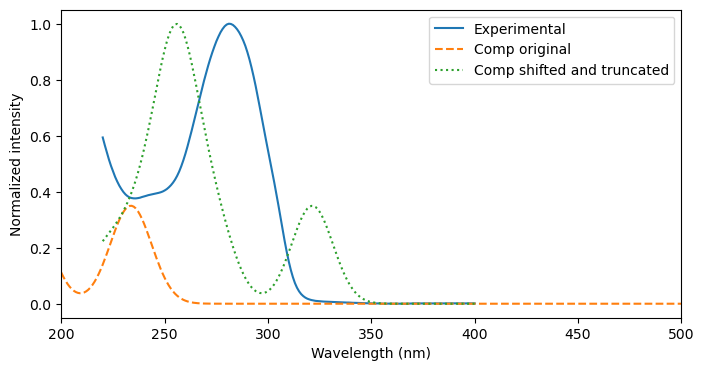

In [244]:
for index, row in uvvis_compute.iterrows():
    
    molid = int(row['molecule'])

            
    if molid < 210 or molid > 215:
        continue
    
    x_exp = np.arange(220, 401, 1)
    y_exp = uvvis_data.iloc[molid, 1:].to_numpy()

    x_trunc_shift, y_trunc_shift = get_shifted_comp(molid, 87.77038)
    
    # comp: from 0 to 800 nm
    x_comp = np.arange(0, 801, 1)
    y_comp = pd.read_json(uvvis_compute.loc[uvvis_compute['molecule'] == molid]['spectrum'].iloc[0]).values.flatten()

    plt.figure(figsize=(8,4))
    plt.plot(x_exp, y_exp,    label='Experimental')
    plt.plot(x_comp, y_comp, '--', label='Comp original')
    plt.plot(x_trunc_shift,  y_trunc_shift, ':', label='Comp shifted and truncated')
    
    plt.xlim(200,500)
    plt.legend()
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Normalized intensity')  
    plt.show()
 

Ok. That seems to work. Now let's continue with the other parameters that wee need for the dataset.

In [254]:
molid = uvvis_compute.iloc[0]['molecule']


x_exp = np.arange(220, 401, 1)
y_exp = uvvis_data.iloc[molid, 1:].to_numpy()

x_trunc_shift, y_trunc_shift = get_shifted_comp(molid, 87.77038)

# comp: from 0 to 800 nm
x_comp = np.arange(0, 801, 1)
y_comp = pd.read_json(uvvis_compute.loc[uvvis_compute['molecule'] == molid]['spectrum'].iloc[0]).values.flatten()

wavelengths = pd.read_json(uvvis_compute.iloc[0]['wavelengths'])[0].tolist()
strengths = pd.read_json(uvvis_compute.iloc[0]['oscillator_strengths'])[0].tolist()

### Create difference spectrum

In [265]:
diff = y_exp - y_trunc_shift

### Convert XYZ coordinates to Psi4

This section simply converts the XYZ coordinates to a Psi4 object for visualization later.

In [258]:
import psi4
import nglview as nv

coordinates = uvvis_compute.loc[uvvis_compute['molecule'] == molid]['geometry'].iloc[0]
molecule = psi4.geometry(coordinates)

### Visualize geometry

In [ ]:
# view molecule with Psi4
view = nv.show_psi4(molecule)
view

NGLWidget()

### Save geometry

In [257]:
# Define a filename for the XYZ file
filename = "molecule.xyz"

# Create the file and save the XYZ coordinates
with open(filename, 'w') as file:
    molecule.save_xyz_file(filename, 1)

print(f"File created: {filename}")

File created: molecule.xyz


### Add cell dimensions and PBC with ASE package

In [259]:
import ase.io
# Import the XYZ file using ASE
mol = ase.io.read(filename)


In [260]:
# Set the cell dimensions to 100.0 Å in each direction
mol.set_cell((50.0, 50.0, 50.0))

# Enable periodic boundary conditions (PBC) in all three dimensions
mol.set_pbc((True, True, True))

<Axes: >

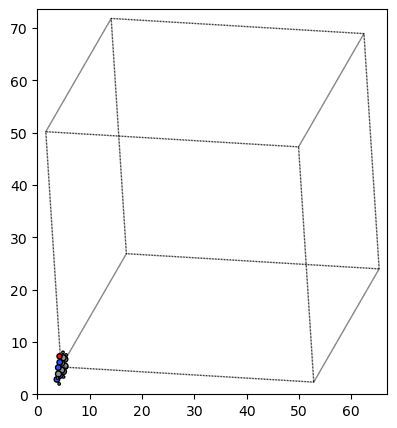

In [261]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the molecule using ASE's plot_atoms function
plot_atoms(mol, ax, radii=0.75, rotation=('60x, 60y, 60z'))


### Make species

In [262]:
# Extract unique chemical symbols from the molecule
species_list = list(set(mol.get_chemical_symbols()))

# Print the list of unique species
print(species_list)

['C', 'N', 'O', 'H']


### Make formula

In [263]:
# Generate a formula string by extracting and sorting unique chemical symbols
formula_string = ''.join(sorted(set([atom.symbol for atom in mol])))

# Print the molecular formula string
print(formula_string)

CHNO


### Get molecule name

In [264]:
import pubchempy

# Extract the SMILES string from the DataFrame at row index 220, column 0
smiles = uvvis_data.iloc[molid, 0]

# Fetch compound information from PubChem using the SMILES string
compounds = pubchempy.get_compounds(smiles, namespace='smiles')

# Get the first matching comapound
match = compounds[0]

# Print the IUPAC name of the compound
print(match.iupac_name)

name = match.iupac_name

1-oxido-1,2,4-benzotriazin-1-ium-3-amine


### Create dictionary for molecular structure

In [217]:
def atoms_to_dict(atoms):
    atoms_dict = atoms.todict()
    for key in atoms_dict:
        if isinstance(atoms_dict[key], np.ndarray ):
            atoms_dict[key] = [item.tolist() if hasattr(item, 'tolist') else item for item in atoms_dict[key]]
            
    return atoms_dict

### Combine data

#### Dictionary Construction for Material Properties

This code constructs a dictionary row containing various properties of a molecular or material structure. The dictionary includes:

- mp_id: The material project ID (mpid).
- structure: The structure of the molecule converted to a dictionary format using the atoms_to_dict function.
- name: The name of the molecule or material.
- phfreq: A list of xvalues for UVVis converted from numpy array xvalues to a list.
- phdos: A list of experimental - computational UVVis energies converted from numpy array yvalues to a list.
- pdos: An empty list for partial density of states.
- formula: The molecular formula string (formula_string).
- species: A list of unique chemical species present in the structure (species_list).
- expt: A list of experimental UVVis energies converted from numpy array yvalues to a list.
- comp: A list of computational UVVis energies converted from numpy array yvalues to a list.
- wavelengths: a list of excited state wavelengths
- strengths: a list of excited state oscillator strengths

Finally, the constructed dictionary row is printed. This function is useful for ensuring compatibility with formats that do not support numpy arrays directly, such as JSON or certain databases.

In [267]:

row = {'mp_id': molid, 
        'structure': atoms_to_dict(mol), 
        'name': name,
        'phfreq': x_exp.tolist(), 
        'phdos': diff.tolist(),
        'pdos':[],
        'formula': formula_string,
        'species': species_list,
        'expt': y_exp.tolist(),
        'comp': y_trunc_shift.tolist(),
        'wavelengths': wavelengths,
        'strengths': strengths}
print(row)

{'mp_id': 0, 'structure': {'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, 7, 1, 1, 1, 1, 1, 1], 'positions': [[-3.171921047818, -1.125049603902, -0.04556402868], [-1.916566047818, -0.562984603902, -0.03287702868], [-0.876011047818, -1.390726603902, -0.01095202868], [0.346095952182, -0.860158603902, -0.00385402868], [0.545812952182, 0.513245396098, -0.00105602868], [1.849451952182, 1.066342396098, 0.00888097132], [2.958219952182, 0.227021396098, 0.01496797132], [2.766859952182, -1.150883603902, 0.01191597132], [1.469963952182, -1.679606603902, 0.00292097132], [-0.612868047818, 1.272589396098, -0.00279802868], [-0.573791047818, 2.540806396098, 0.01696597132], [-1.835385047818, 0.749599396098, -0.01096202868], [-3.161578047818, -2.060303603902, 0.33595097132], [-3.864339047818, -0.480500603902, 0.31170997132], [1.978653952182, 2.147773396098, 0.01173497132], [3.962895952182, 0.643523396098, 0.02183597132], [3.624349952182, -1.820663603902, 0.01587097132], [1.335924952182, -2.759895603902, -

### Putting it all Together
OK. Now that we have that we can apply it to every molecule in the UV-Vis dataset. The following cells will help us do that. First let's reload import all libraries again.

In [268]:
import pandas as pd
import numpy as np
import pubchempy 
import psi4
from ase import Atoms
import ase.io
from tempfile import NamedTemporaryFile

from ase import Atoms
from ase.optimize import BFGS
from ase.calculators.mopac import MOPAC

from openbabel import pybel


Now let's load the data from the CSV file to a pandas dataframe

In [139]:
uvvis_data = pd.read_csv("UV_w_SMILES.csv",header=None)
uvvis_data.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,NC1=NC2=C(C=CC=C2)[N+]([O-])=N1,0.299539,0.311787,0.328491,0.349915,0.376548,0.408694,0.446354,0.489792,0.537421,...,0.092434,0.095006,0.097484,0.099952,0.102239,0.104428,0.106597,0.108721,0.110758,0.112611
1,NC1=NC2=C(C=CC=C2)N=N1,0.411922,0.447550,0.487158,0.530422,0.576958,0.626523,0.678088,0.731087,0.783621,...,0.094415,0.095031,0.095445,0.095832,0.095950,0.095919,0.095820,0.095594,0.095204,0.094772
2,CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1,0.732482,0.794217,0.853497,0.907398,0.952023,0.983787,1.000000,0.998714,0.982111,...,0.398864,0.409874,0.420358,0.429326,0.437889,0.445579,0.452843,0.459056,0.464107,0.468328
3,CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O,0.412611,0.399813,0.390055,0.382307,0.376957,0.373062,0.371521,0.370622,0.371992,...,0.033980,0.029478,0.024774,0.020789,0.017146,0.013311,0.009733,0.006266,0.003120,0.000000
4,NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O,0.991241,1.000000,0.996943,0.979253,0.944010,0.890630,0.820660,0.739217,0.655266,...,0.000543,0.000694,0.000529,0.000495,0.000374,0.000433,0.000577,0.000560,0.000574,0.000412


And the compute CSV file.

In [270]:
uvvis_compute = pd.read_csv("spectra.csv",header=0)
uvvis_compute.head()

,molecule,wavelengths,oscillator_strengths,width,kind,spectrum,geometry
0,0,"[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01...",10.0,gaussian,"[6.584023782400465e-37, 2.3158380383515078e-36...",N -3.194913 -1.099563 -0.049679\nC -1.939558 -...
1,1,"[553.3, 447.55, 410.57, 338.85, 292.74, 258.73...","[0.0, 0.0, 0.0, 0.0056, 0.0, 0.1391, 0.0, 0.02...",10.0,gaussian,"[2.445615581585906e-39, 8.82581111898111e-39, ...",N -3.316261 -0.627553 -0.037143\nC -2.017001 -...
2,2,"[376.59, 301.83, 291.23, 282.71, 272.19, 249.0...","[0.0, 0.0, 0.2372, 0.0, 0.0, 0.0446, 0.0001, 0...",10.0,gaussian,"[1.5542069668862901e-40, 5.78935876725559e-40,...",C -3.695356 -0.455952 0.885831\nC -3.060721 0....
3,3,"[411.48, 297.54, 276.24, 274.52, 259.06, 253.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196, 0.0, 0....",10.0,gaussian,"[9.102330535330581e-40, 3.428097820136208e-39,...",C -1.994391 -2.196876 -1.200074\nN -2.613428 -...
4,4,"[336.14, 310.85, 287.29, 270.0, 251.64, 245.75...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009...",10.0,gaussian,"[8.606801642423844e-41, 3.2606417532714058e-40...",N -1.218708 -2.583113 -0.521656\nC -1.542766 -...


In [271]:
def atoms_to_dict(atoms):
    atoms_dict = atoms.todict()
    for key in atoms_dict:
        if isinstance(atoms_dict[key], np.ndarray ):
            atoms_dict[key] = [item.tolist() if hasattr(item, 'tolist') else item for item in atoms_dict[key]]
            
    return atoms_dict

In [142]:
# Set Psi4 options
psi4.set_memory('500 MB')
psi4.set_num_threads(1)
psi4.core.be_quiet()


molecule = psi4.geometry(coordinates)


The following cell initializes an empty DataFrame with columns to store UV-Vis data and associated molecular information. The script defines the X-values for the UV-Vis spectrum.

The main part of the script iterates through each row in the uvvis_df DataFrame. For each SMILES string in the DataFrame, the script converts the SMILES to XYZ coordinates and fetches the compound name from PubChem. Using Psi4, it defines the molecular geometry and creates a temporary XYZ file for ASE to read the molecule's structure.

After reading the XYZ file, the script sets the cell dimensions and periodic boundary conditions. It then extracts the unique chemical species and formula, as well as Y-values from the DataFrame row. A dictionary is created for the new row, containing all relevant data, and this dictionary is appended to the DataFrame.


In [282]:
from tqdm.notebook import tqdm

# Initialize the DataFrame
df = pd.DataFrame(columns=['uvvis_id', 'structure', 'name', 'phfreq', 'phdos', 'pdos', 'formula', 'species', 'smiles', 'expt', 'comp', 'wavelengths', 'strengths'])

# X-values for UV-Vis'
xvalues = np.arange(220, 401, 1)

for index, row in tqdm(uvvis_compute.iterrows(), total=len(uvvis_compute), desc="Generating UV-Vis machine learning dataset"):

    
    molid = int(row['molecule'])
    smiles = uvvis_data.iloc[molid, 0]


    y_exp = uvvis_data.iloc[molid, 1:].to_numpy()

    _, y_trunc_shift = get_shifted_comp(molid, 87.77038)

    y_diff = y_exp - y_trunc_shift
    
    wavelengths = pd.read_json(uvvis_compute.iloc[0]['wavelengths'])[0].tolist()
    strengths = pd.read_json(uvvis_compute.iloc[0]['oscillator_strengths'])[0].tolist()

    # Get compound name from PubChem
    compounds = pubchempy.get_compounds(smiles, namespace='smiles')
    name = compounds[0].iupac_name

    # Define the molecule using Psi4
    mol_psi4 = psi4.geometry(coordinates)

    temp_filename = ""
    # Create a temporary XYZ file for ASE
    with NamedTemporaryFile(delete=False, suffix=".xyz") as file:
        mol_psi4.save_xyz_file(file.name, 1)
        temp_filename = file.name

    # Read the molecule from the XYZ file
    mol = ase.io.read(temp_filename)
    mol.set_cell((25.0, 25.0, 25.0))
    mol.set_pbc((True, True, True))

    # Extract species and formula
    species_list = list(set(mol.get_chemical_symbols()))
    formula_string = ''.join(sorted(set([atom.symbol for atom in mol])))

    # Create a dictionary for the new row
    panda_row = {
        'uvvis_id': molid,
        'structure': atoms_to_dict(mol), 
        'name': name,
        'phfreq': xvalues.tolist(), 
        'phdos': y_diff.tolist(),
        'pdos':[],
        'formula': formula_string,
        'species': species_list,
        'smiles': smiles,
        'expt': y_exp.tolist(),
        'comp': y_trunc_shift.tolist(),
        'wavelengths': wavelengths,
        'strengths': strengths}

    # Append the new row to the DataFrame
    new_data = pd.DataFrame([panda_row])
    df = pd.concat([df, new_data], ignore_index=True)

Shifting spectra:   0%|          | 0/919 [00:00<?, ?it/s]

Let's check out the top of the database (the first five molecule entries) to see that everything worked as expected.

In [283]:
df.head()

,uvvis_id,structure,name,phfreq,phdos,pdos,formula,species,smiles,expt,comp,wavelengths,strengths
0,0,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","1-oxido-1,2,4-benzotriazin-1-ium-3-amine","[220, 221, 222, 223, 224, 225, 226, 227, 228, ...","[0.00545493602181818, -0.0009327675947411462, ...",[],CHNO,"[C, N, O, H]",NC1=NC2=C(C=CC=C2)[N+]([O-])=N1,"[0.2995391705069124, 0.3117872656432793, 0.328...","[0.29408423448509424, 0.31272003323802045, 0.3...","[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01..."
1,1,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","1,2,4-benzotriazin-3-amine","[220, 221, 222, 223, 224, 225, 226, 227, 228, ...","[0.061507599993834705, 0.08289047259835541, 0....",[],CHNO,"[C, N, O, H]",NC1=NC2=C(C=CC=C2)N=N1,"[0.4119215356773526, 0.4475504136504654, 0.487...","[0.3504139356835179, 0.36465994105210997, 0.37...","[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01..."
2,2,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","3-ethyl-1-oxido-1,2,4-benzotriazin-4-ium 4-oxide","[220, 221, 222, 223, 224, 225, 226, 227, 228, ...","[0.16630511196350628, 0.17602605495895873, 0.1...",[],CHNO,"[C, N, O, H]",CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1,"[0.7324821401428788, 0.7942170308791375, 0.853...","[0.5661770281793725, 0.6181909759201788, 0.668...","[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01..."
3,3,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","N,N-dimethyl-1-(5-nitro-1H-indol-3-yl)methanamine","[220, 221, 222, 223, 224, 225, 226, 227, 228, ...","[0.0003351236852380257, -0.026191366306799357,...",[],CHNO,"[C, N, O, H]",CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O,"[0.4126111781675612, 0.399813383326057, 0.3900...","[0.4122760544823232, 0.42600474963285634, 0.43...","[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01..."
4,4,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","2-(1,3-dioxoisoindol-2-yl)ethyl carbamimidothi...","[220, 221, 222, 223, 224, 225, 226, 227, 228, ...","[0.858653998895628, 0.8570990149141102, 0.8435...",[],CHNO,"[C, N, O, H]",NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O,"[0.991240815737678, 1.0, 0.9969428729437384, 0...","[0.13258681684204998, 0.14290098508588972, 0.1...","[341.48, 298.89, 274.62, 260.75, 258.83, 239.6...","[0.0, 0.0, 0.0, 0.1778, 0.0, 0.0002, 0.0, 0.01..."


Finally we can save the data to a csv file so that it can be read by our machine learning algorithm. 

In [284]:
df.to_csv('uvvis_with_comp.csv', index=False)

Great! That's it. You're finished.